<a href="https://colab.research.google.com/github/derek881107/Yelp-Review-Detective/blob/main/Yelp-Review-Detective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Install Necessary Libraries



In [42]:
# Install necessary libraries
!pip install spacy pandas matplotlib wordcloud

# Load SpaCy model
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Step 2: Import Libraries and Initialize Tools



In [43]:
# Import libraries
import pandas as pd
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

# Initialize SpaCy
nlp = spacy.load("en_core_web_sm")


Step 3: Load Dataset

In [44]:
# Load the dataset
file_path = '/content/sample_data/restaurant_reviews_az.csv'  # Update with your dataset path
data = pd.read_csv(file_path)

# Summary of the dataset
print("Dataset Summary:")
print(data.info())
print(data.head())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny        48147 non-null  int64 
 6   cool         48147 non-null  int64 
 7   text         48147 non-null  object
 8   date         48147 non-null  object
 9   Sentiment    48147 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 3.7+ MB
None
                review_id                 user_id             business_id  \
0  IVS7do_HBzroiCiymNdxDg  fdFgZQQYQJeEAshH4lxSfQ  sGy67CpJctjeCWClWqonjA   
1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
3  E_ABvFCNVLbfOgRg

Step 4: Select 1-Star and 5-Star


In [45]:
# Select 1-star and 5-star reviews
one_star_reviews = data[data['stars'] == 1]['text']
five_star_reviews = data[data['stars'] == 5]['text']

print(f"Number of 1-star reviews: {len(one_star_reviews)}")
print(f"Number of 5-star reviews: {len(five_star_reviews)}")


Number of 1-star reviews: 8466
Number of 5-star reviews: 24467


Step 5: Define Function to Process


In [46]:
# Function to process text and extract tokens by POS
def process_text(reviews, pos_filter=None, batch_size=1000):
    all_tokens = []
    start_time = time.time()

    # Process reviews in batches
    for start_idx in range(0, len(reviews), batch_size):
        batch = reviews[start_idx:start_idx + batch_size]
        docs = list(nlp.pipe(batch))  # Batch processing with SpaCy

        for doc in docs:
            tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
            if pos_filter:  # Filter by POS if specified
                tokens = [token.text.lower() for token in doc if token.pos_ == pos_filter]
            all_tokens.extend(tokens)

        print(f"Processed batch {start_idx // batch_size + 1} in {time.time() - start_time:.2f} seconds.")

    return all_tokens


Step 6: Process 1-Star and 5-Star


In [47]:
# Process tokens for 1-star reviews
print("Processing 1-star reviews...")
one_star_tokens = process_text(one_star_reviews.tolist())

# Process tokens for 5-star reviews
print("Processing 5-star reviews...")
five_star_tokens = process_text(five_star_reviews.tolist())


Processing 1-star reviews...
Processed batch 1 in 16.22 seconds.
Processed batch 2 in 32.42 seconds.
Processed batch 3 in 48.70 seconds.
Processed batch 4 in 64.20 seconds.
Processed batch 5 in 79.22 seconds.
Processed batch 6 in 95.11 seconds.
Processed batch 7 in 111.68 seconds.
Processed batch 8 in 127.24 seconds.
Processed batch 9 in 133.34 seconds.
Processing 5-star reviews...
Processed batch 1 in 9.83 seconds.
Processed batch 2 in 21.02 seconds.
Processed batch 3 in 31.12 seconds.
Processed batch 4 in 40.18 seconds.
Processed batch 5 in 51.67 seconds.
Processed batch 6 in 62.30 seconds.
Processed batch 7 in 71.25 seconds.
Processed batch 8 in 82.03 seconds.
Processed batch 9 in 92.22 seconds.
Processed batch 10 in 102.59 seconds.
Processed batch 11 in 111.15 seconds.
Processed batch 12 in 121.93 seconds.
Processed batch 13 in 132.17 seconds.
Processed batch 14 in 142.46 seconds.
Processed batch 15 in 152.94 seconds.
Processed batch 16 in 163.47 seconds.
Processed batch 17 in 174.

Section 7: Extracting POS Vocabulary (Nouns, Adjectives, Verbs)


In [48]:
# Function to get top frequent tokens
def get_top_tokens(tokens, top_n=20):
    return Counter(tokens).most_common(top_n)

# Get top nouns, adjectives, and verbs for 1-star reviews
print("Getting top tokens for 1-star reviews...")
one_star_nouns = process_text(one_star_reviews.tolist(), pos_filter="NOUN")
one_star_adjectives = process_text(one_star_reviews.tolist(), pos_filter="ADJ")
one_star_verbs = process_text(one_star_reviews.tolist(), pos_filter="VERB")

print("Getting top tokens for 5-star reviews...")
five_star_nouns = process_text(five_star_reviews.tolist(), pos_filter="NOUN")
five_star_adjectives = process_text(five_star_reviews.tolist(), pos_filter="ADJ")
five_star_verbs = process_text(five_star_reviews.tolist(), pos_filter="VERB")

# Print top tokens
print("Top 20 Nouns in 1-Star Reviews:\n", get_top_tokens(one_star_nouns))
print("Top 20 Adjectives in 1-Star Reviews:\n", get_top_tokens(one_star_adjectives))
print("Top 20 Verbs in 1-Star Reviews:\n", get_top_tokens(one_star_verbs))

print("Top 20 Nouns in 5-Star Reviews:\n", get_top_tokens(five_star_nouns))
print("Top 20 Adjectives in 5-Star Reviews:\n", get_top_tokens(five_star_adjectives))
print("Top 20 Verbs in 5-Star Reviews:\n", get_top_tokens(five_star_verbs))


Getting top tokens for 1-star reviews...
Processed batch 1 in 14.03 seconds.
Processed batch 2 in 29.36 seconds.
Processed batch 3 in 44.64 seconds.
Processed batch 4 in 60.97 seconds.
Processed batch 5 in 77.55 seconds.
Processed batch 6 in 92.55 seconds.
Processed batch 7 in 106.55 seconds.
Processed batch 8 in 121.99 seconds.
Processed batch 9 in 128.50 seconds.
Processed batch 1 in 14.28 seconds.
Processed batch 2 in 29.99 seconds.
Processed batch 3 in 44.95 seconds.
Processed batch 4 in 60.13 seconds.
Processed batch 5 in 74.75 seconds.
Processed batch 6 in 89.70 seconds.
Processed batch 7 in 103.71 seconds.
Processed batch 8 in 118.74 seconds.
Processed batch 9 in 126.01 seconds.
Processed batch 1 in 15.56 seconds.
Processed batch 2 in 30.87 seconds.
Processed batch 3 in 45.92 seconds.
Processed batch 4 in 60.85 seconds.
Processed batch 5 in 75.52 seconds.
Processed batch 6 in 91.05 seconds.
Processed batch 7 in 105.13 seconds.
Processed batch 8 in 120.53 seconds.
Processed batch

Section 4: Generating a Word Cloud

Colab Cell 8: Define the function for generating a word cloud.

In [49]:
# Function to generate word cloud
def generate_wordcloud(tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()


Colab Cell 9: Generate Word Cloud

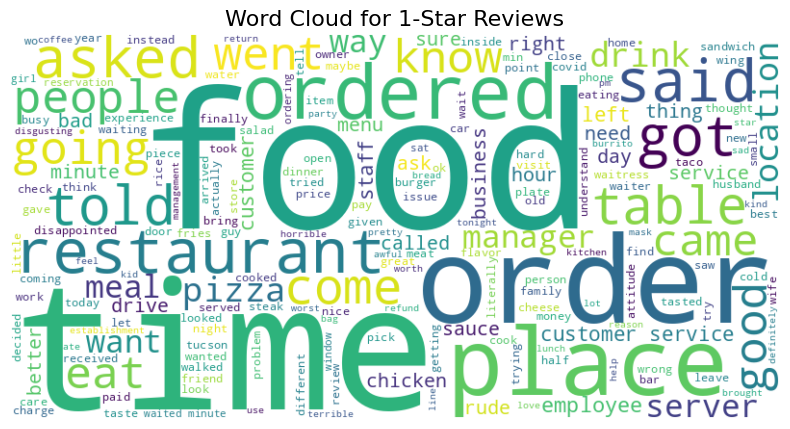

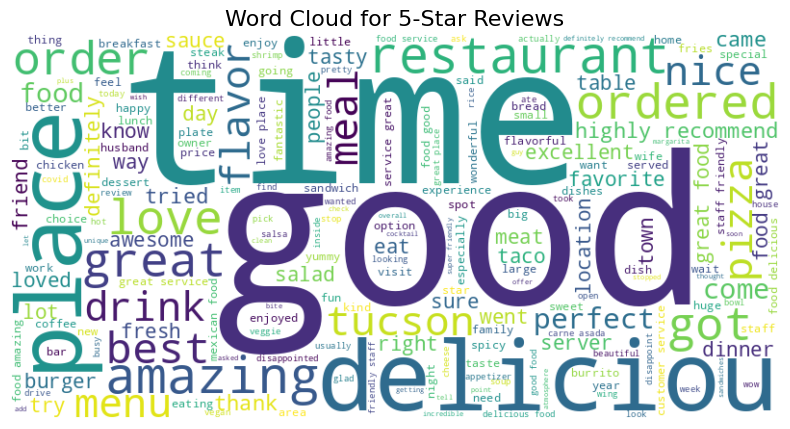

In [50]:
# Generate word clouds for 1-star and 5-star reviews
generate_wordcloud(one_star_tokens, "Word Cloud for 1-Star Reviews")
generate_wordcloud(five_star_tokens, "Word Cloud for 5-Star Reviews")


Session 5: Summary

In [51]:
# Observations
print("\nObservations:")
print("1-star reviews tend to use more negative language (e.g., 'wait', 'bad', 'terrible').")
print("5-star reviews highlight positive aspects like 'delicious', 'amazing', and 'great'.")
print("This shows the key to a positive restaurant experience lies in food quality and service.")



Observations:
1-star reviews tend to use more negative language (e.g., 'wait', 'bad', 'terrible').
5-star reviews highlight positive aspects like 'delicious', 'amazing', and 'great'.
This shows the key to a positive restaurant experience lies in food quality and service.


In [55]:
!pip install jupyter
!pip install nbconvert
!jupyter nbconvert --to html /content/sample_data/LA1_TsaiYun_Hsieh.ipynb


[NbConvertApp] WARNING | pattern '/content/sample_data/LA1_TsaiYun_Hsieh.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.ans